## Use phot-griz environment (updated photutils)

In [1]:
# General imports
import os
import numpy as np
import matplotlib.pyplot as plt

# Segmentation
from astropy.io import fits
from photutils.segmentation import SourceFinder, make_2dgaussian_kernel, SourceCatalog
from photutils.background import Background2D, MedianBackground
from astropy.convolution import convolve

# grizli
from grizli.model import GrismFLT

os.chdir("/Users/keith/astr/research_astr/summer-roman-project/new-sims/fits")

In [2]:
# Process direct image and produce segmentation map

# Open image
direct_file = "rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits"
seg_file = "seg.fits"
direct_fits = fits.open(direct_file)
data, header = (direct_fits[1].data, direct_fits[1].header)


# Subtract background
bkg_estimator = MedianBackground()
bkg = Background2D(data, (511,511), filter_size=(3,3), bkg_estimator=bkg_estimator)
data -= bkg.background

# Convolve image
kernel = make_2dgaussian_kernel(3.0, 5)
convolved_data = convolve(data, kernel)

# Instantiate the SourceFinder and set threshold
finder = SourceFinder(npixels=7, nlevels=32, contrast=0.001)
threshold = 2 * bkg.background_rms

seg_map = finder(convolved_data, threshold)

# Save seg_map as fits
fits.writeto(seg_file, seg_map, header=header,overwrite=True)

Deblending:   0%|          | 0/6281 [00:00<?, ?it/s]

In [3]:
# Create Catalog
cat = SourceCatalog(data, seg_map, convolved_data=convolved_data)
cat.add_extra_property('id', cat.label, overwrite=True)
cat.add_extra_property('mag', cat.segment_flux, overwrite=True)
cat.add_extra_property('x_flt', cat.xcentroid, overwrite=True)
cat.add_extra_property('y_flt', cat.ycentroid, overwrite=True)

columns = ['id', 'x_flt', 'y_flt', 'mag', 'area', 'semimajor_sigma', 'semiminor_sigma',
           'orientation', 'eccentricity', 'min_value', 'max_value']
tbl = cat.to_table(columns)

In [4]:
# Mask a box on the sky
mask = (abs(tbl["x_flt"] - 2370) < 100) & (abs(tbl["y_flt"] - 3350) < 100)
mask_2 = (abs(tbl["x_flt"] - 2000) < 500) & (abs(tbl["y_flt"] - 250) < 100)

In [5]:
# Instantiate the GrismFLT object
sim_fov0 = GrismFLT(direct_file=direct_file, seg_file=seg_file)
sim_fov0_2 = GrismFLT(direct_file=direct_file, seg_file=seg_file)



Image cutout: x=slice(0, 4088, None), y=slice(0, 4088, None) [Out of range]
rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits / Pad ref HDU with 576 pixels
rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits / blot segmentation seg.fits[0]
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       config_testbed      imagefindpars           mapreg       
       photeq            pixreplace           pixtopix            pixtosky      
  refimagefindpars       resetbits          runastrodriz          skytopix      
     tweakback            tweakreg           updatenpol
Using default C-based coordinate transformation...
Using default C-based coordinate transformation...
Image cutout: x=slice(0, 4088, None), y=slice(0, 4088, None) [Out of range]
rotated_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits / P

In [6]:
sim_fov0.compute_full_model(ids=tbl['id'][mask], mags=tbl['mag'][mask], mag_limit=28)

dyc: [16 16 16 ... 10 10 10] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [15 15 15 ...  9  9  9] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [15 15 15 ...  9  9  9] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [15 15 15 ...  9  9  9] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [14 14 14 ...  8  8  8] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [14 14 14 ...  8  8  8] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [14 14 14 ...  9  9  9] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [14 14 14 ...  8  8  8] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [14 14 14 ...  8  8  8] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [13 13 13 ...  8  8  8] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 

dyc: [13 13 13 ...  8  8  8] 
self.x0[0]

In [7]:
sim_fov0_2.compute_full_model(ids=tbl['id'][mask_2], mags=tbl['mag'][mask_2], mag_limit=28)

dyc: [63 63 63 ... 41 41 41] 
self.x0[0]: 25 
self.dxpix: [  25   26   27 ... 1622 1623 1624] 


########################################## 
# ! Exception (2024-06-18 16:46:39.134)
#
# !Traceback (most recent call last):
# !  File "/Users/keith/miniconda3/envs/phot-griz/lib/python3.12/site-packages/grizli/model.py", line 419, in process_config
# !    self.flat_index = self.idx[dyc + self.x0[0], self.dxpix]
# !                      ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# !IndexError: index 88 is out of bounds for axis 0 with size 52
# !
# !During handling of the above exception, another exception occurred:
# !
# !Traceback (most recent call last):
# !  File "/Users/keith/miniconda3/envs/phot-griz/lib/python3.12/site-packages/grizli/model.py", line 3177, in compute_model_orders
# !    beam = GrismDisperser(id=id,
# !           ^^^^^^^^^^^^^^^^^^^^^
# !  File "/Users/keith/miniconda3/envs/phot-griz/lib/python3.12/site-packages/grizli/model.py", line 289, in __init__
# !    self.process_c

Text(0.5, 1.0, 'Cutout Close to Origin')

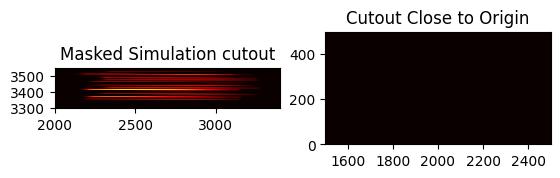

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(sim_fov0.model/1.9e18, interpolation='Nearest', 
           origin='lower', vmin=0, vmax=1, cmap='hot')
ax1.set_xlim(2000,3400)
ax1.set_ylim(3300,3550)
ax1.set_title("Masked Simulation cutout")

ax2.imshow(sim_fov0_2.model/1.9e18, interpolation='Nearest', 
           origin='lower', vmin=0, vmax=1, cmap='hot')
ax2.set_xlim(1500,2500)
ax2.set_ylim(0,500)
ax2.set_title("Cutout Close to Origin")